# StarHotel: Final Project 
Is it possible to predict the level of a hotel by its characteristics ?

# Part 1 crawling From Booking.com 

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


def check_facility_exists(df, facility):
    df[facility] = df['facilities'].apply(lambda x: facility in x)
    return df



def facilities_list_without_duplicates(lst_of_lst):
    facilities_list = []
    for sub_list in lst_of_lst:
        for val in sub_list:
            if val not in facilities_list:
                facilities_list.append(val)
    return facilities_list

#  create Lists
branch_names = []
branch_rating = []
branch_facilitiesAndServices = []
branch_numOfFacilitiesAndServices =[]
cities = [
      "Paris","Marseille", "Lyon" , "Nice", "Nantes", "Strasbourg"
]
branch_city = []

for k in range(len(cities)):
        opset = 0
        for i in range(39):
            print(cities[k])
            headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}
            try:
                target_url = "https://www.booking.com/searchresults.en-us.html?aid=7965225&lang=en-us&sid=4dc310284f88d2a3f8b9c9061560a7ef&sb=1&sb_lp=1&src=index&src_elem=sb&error_url=https%3A%2F%2Fwww.booking.com%2Findex.en-us.html%3Faid%3D7965225%26sid%3D4dc310284f88d2a3f8b9c9061560a7ef%26sb_price_type%3Dtotal%3Bsrpvid%3Dcc2f829be2810053%26%26&ss="+cities[k]+"&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&efdco=1&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=france&ac_position=0&ac_langcode=en&ac_click_type=b&ac_meta=GhA5YzVjODJhMGUyY2IwMjkxIAAoATICZW46BmZyYW5jZUAASgBQAA%3D%3D&dest_id=73&dest_type=country&place_id_lat=46.8664&place_id_lon=2.59596&search_pageview_id=9c5c82a0e2cb0291&search_selected=true&search_pageview_id=9c5c82a0e2cb0291&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&offset="+str(opset)
            except:
                print("ERORR")
            opset = opset + 25
            print(opset)
            try:
                resp = requests.get(target_url, headers=headers)
                soup = BeautifulSoup(resp.text, 'html.parser')
            except:
                print("ERORR2")
            branches = soup.find_all("div", {"class": "a826ba81c4 fe821aea6c fa2f36ad22 afd256fc79 d08f526e0d ed11e24d01 ef9845d4b3 da89aeb942"})
            a_href = soup.find_all("a", {"class": "e13098a59f"})

            for branch in branches:
                try:
                    name = branch.find("div", {"class": "fcab3ed991 a23c043802"}).get_text()
                    rating = branch.find("div", {"class": "b5cd09854e d10a6220b4"}).get_text()
                    href = branch.find("a", {"class": "e13098a59f"}).get("href")
                    resp_herf = requests.get(href, headers=headers)
                    soup_herf = BeautifulSoup(resp_herf.text, 'html.parser')
                    facilitiesAndServices = soup_herf.find_all("div", {"class": "bui-list__description"})
                except:
                    print("An exception occurred")

                facilitiesAndServices_text = [i.get_text() for i in facilitiesAndServices]
                branch_names.append(name)
                branch_rating.append(rating)
                branch_numOfFacilitiesAndServices.append(len(facilitiesAndServices))
                branch_facilitiesAndServices.append(facilitiesAndServices_text)
                branch_city.append(cities[k])


        


 #delete the newline character \n at the beginning and end of each string in a list of lists
stripped_list_of_lists = [[val.strip() for val in sublist] for sublist in branch_facilitiesAndServices]

#create a list of all the facilities in all the hotels
testedFacilitiesAndServices = facilities_list_without_duplicates(branch_facilitiesAndServices)
#create the first basic df before split the facilities coloumn
df = pd.DataFrame({'Name':branch_names, 'rating':branch_rating , 'facilities':stripped_list_of_lists, 'numOfFacilitiesAndServices':branch_numOfFacilitiesAndServices  ,'City':branch_city})

#Create coloumn for each facility that we want to check (from the list above)
#and check if exists using function and set boolean value in the new column
for facility in testedFacilitiesAndServices:
     check_facility_exists(df, facility)

df.to_excel("FINALNEW.xlsx")

# Part 2 - Data Cleaning 

Duplicative data,
Missing Data,
Outliers,
Data type casting

In [233]:
#load CSV 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#Load excel form the Computer 
def load_excel(file_name):
    return pd.read_excel(file_name)

#Basic data Exploratio
file_name = "FINALNEW.xlsx" 
df= load_excel(file_name)
df

,Unnamed: 0.1,Unnamed: 0,Name,rating,facilities,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,...,Public transport tickets,Kids' pool\n\nAdditional charge,Table tennis\n\nAdditional charge,Air conditioning\n\nAdditional charge,Movie nights\n\nAdditional charge,Cooking class\n\nOff-site,Snorkelling\n\nAdditional charge,Bingo,Sun loungers or beach chairs\n\nAdditional charge,Mandarin
0,0,0,Casa e Natura,9.1,"['Towels/sheets (extra fee)', 'Private bathroo...",73,Paris,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,1,1,Résidence Balcons de La Neste,8.3,"['Toilet paper', 'Towels/sheets (extra fee)', ...",82,Paris,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2,2,ANA LOCATION - Résidence Lou Cigaloun,9.1,"['Toilet paper', 'Towels', 'Bath or shower', '...",61,Paris,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,3,3,Chalet Les Prés,9.5,"['Parking', ""Children's high chair"", 'Dining t...",64,Paris,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,4,4,Lou cantou,9.3,"['Street parking', 'Dining table', 'Coffee mac...",88,Paris,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,5220,5220,ecrin de fleurs et verdure,8.6,"['Toilet paper', 'Towels', 'Towels/sheets (ext...",59,Strasbourg,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5221,5221,5221,Studios de l'Etang du perray,8.2,"['Toilet paper', 'Towels', 'Shared toilet', 'P...",41,Strasbourg,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5222,5222,5222,Le Laguennois T3 de 45m2 A proximité de TULLE,9.3,"['Street parking', 'Dining table', 'Coffee mac...",55,Strasbourg,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5223,5223,5223,LES ROCHES DE COIGNE,9.0,"['Toilet paper', 'Towels', 'Towels/sheets (ext...",102,Strasbourg,True,True,True,...,False,False,False,False,False,False,False,False,False,False


 Duplicative data 

In [234]:
#Print the sum of Duplicate By Name of Hotel and City 
print(df.duplicated(subset=["Name","City"]).sum())

#Remove Duplicates
df.drop_duplicates(subset=["Name","City"], keep='first' , inplace=True )

#Print the sum of Duplicate By Name of Hotel and City After the remove 
print(df.duplicated(subset=["Name","City"]).sum())

df 

641
0


,Unnamed: 0.1,Unnamed: 0,Name,rating,facilities,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,...,Public transport tickets,Kids' pool\n\nAdditional charge,Table tennis\n\nAdditional charge,Air conditioning\n\nAdditional charge,Movie nights\n\nAdditional charge,Cooking class\n\nOff-site,Snorkelling\n\nAdditional charge,Bingo,Sun loungers or beach chairs\n\nAdditional charge,Mandarin
0,0,0,Casa e Natura,9.1,"['Towels/sheets (extra fee)', 'Private bathroo...",73,Paris,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,1,1,Résidence Balcons de La Neste,8.3,"['Toilet paper', 'Towels/sheets (extra fee)', ...",82,Paris,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2,2,ANA LOCATION - Résidence Lou Cigaloun,9.1,"['Toilet paper', 'Towels', 'Bath or shower', '...",61,Paris,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,3,3,Chalet Les Prés,9.5,"['Parking', ""Children's high chair"", 'Dining t...",64,Paris,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,4,4,Lou cantou,9.3,"['Street parking', 'Dining table', 'Coffee mac...",88,Paris,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,5220,5220,ecrin de fleurs et verdure,8.6,"['Toilet paper', 'Towels', 'Towels/sheets (ext...",59,Strasbourg,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5221,5221,5221,Studios de l'Etang du perray,8.2,"['Toilet paper', 'Towels', 'Shared toilet', 'P...",41,Strasbourg,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5222,5222,5222,Le Laguennois T3 de 45m2 A proximité de TULLE,9.3,"['Street parking', 'Dining table', 'Coffee mac...",55,Strasbourg,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5223,5223,5223,LES ROCHES DE COIGNE,9.0,"['Toilet paper', 'Towels', 'Towels/sheets (ext...",102,Strasbourg,True,True,True,...,False,False,False,False,False,False,False,False,False,False


 Handle missing data 

In [235]:
#Drop the rows where all elements are missing.
df.dropna(how='all' , inplace=True) 

#Drop in which columns to look for missing values.
df.dropna(subset=['facilities'] ,inplace=True)

#Drop the Unnamed: 0 col  .
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.drop(['Unnamed: 0.1'], axis=1,inplace=True)
df.drop(['facilities'], axis=1,inplace=True)
df

,Name,rating,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,Hairdryer,Shower,Linen,...,Public transport tickets,Kids' pool\n\nAdditional charge,Table tennis\n\nAdditional charge,Air conditioning\n\nAdditional charge,Movie nights\n\nAdditional charge,Cooking class\n\nOff-site,Snorkelling\n\nAdditional charge,Bingo,Sun loungers or beach chairs\n\nAdditional charge,Mandarin
0,Casa e Natura,9.1,73,Paris,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,Résidence Balcons de La Neste,8.3,82,Paris,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,ANA LOCATION - Résidence Lou Cigaloun,9.1,61,Paris,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Chalet Les Prés,9.5,64,Paris,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,Lou cantou,9.3,88,Paris,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,ecrin de fleurs et verdure,8.6,59,Strasbourg,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5221,Studios de l'Etang du perray,8.2,41,Strasbourg,False,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
5222,Le Laguennois T3 de 45m2 A proximité de TULLE,9.3,55,Strasbourg,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5223,LES ROCHES DE COIGNE,9.0,102,Strasbourg,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


outlier

In [236]:
# oulier_detection (the rating is value = 1-10)
df_filtered = df[(df["rating"] < 0 ) & (df["rating"] > 10 )]
df_filtered

,Name,rating,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,Hairdryer,Shower,Linen,...,Public transport tickets,Kids' pool\n\nAdditional charge,Table tennis\n\nAdditional charge,Air conditioning\n\nAdditional charge,Movie nights\n\nAdditional charge,Cooking class\n\nOff-site,Snorkelling\n\nAdditional charge,Bingo,Sun loungers or beach chairs\n\nAdditional charge,Mandarin


Data type casting 

In [237]:
df = df.replace({True: 1, False: 0})
df

,Name,rating,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,Hairdryer,Shower,Linen,...,Public transport tickets,Kids' pool\n\nAdditional charge,Table tennis\n\nAdditional charge,Air conditioning\n\nAdditional charge,Movie nights\n\nAdditional charge,Cooking class\n\nOff-site,Snorkelling\n\nAdditional charge,Bingo,Sun loungers or beach chairs\n\nAdditional charge,Mandarin
0,Casa e Natura,9.1,73,Paris,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Résidence Balcons de La Neste,8.3,82,Paris,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,ANA LOCATION - Résidence Lou Cigaloun,9.1,61,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Chalet Les Prés,9.5,64,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Lou cantou,9.3,88,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,ecrin de fleurs et verdure,8.6,59,Strasbourg,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5221,Studios de l'Etang du perray,8.2,41,Strasbourg,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5222,Le Laguennois T3 de 45m2 A proximité de TULLE,9.3,55,Strasbourg,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5223,LES ROCHES DE COIGNE,9.0,102,Strasbourg,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [238]:
for column in df.columns[5:]:
    if df[column].eq(1).sum() < 500:
        df = df.drop(column, axis=1)        
df
    

,Name,rating,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,Hairdryer,Shower,Linen,...,Windsurfing,Bicycle rental,Canoeing,Tennis court,Massage,Horse riding,Fruits,Fax,Water park,Bowling
0,Casa e Natura,9.1,73,Paris,1,1,1,1,1,1,...,1,0,1,0,1,1,0,1,0,0
1,Résidence Balcons de La Neste,8.3,82,Paris,1,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,ANA LOCATION - Résidence Lou Cigaloun,9.1,61,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Chalet Les Prés,9.5,64,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Lou cantou,9.3,88,Paris,0,1,1,1,1,1,...,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,ecrin de fleurs et verdure,8.6,59,Strasbourg,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5221,Studios de l'Etang du perray,8.2,41,Strasbourg,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
5222,Le Laguennois T3 de 45m2 A proximité de TULLE,9.3,55,Strasbourg,0,1,1,1,1,0,...,0,0,1,1,0,0,0,0,1,0
5223,LES ROCHES DE COIGNE,9.0,102,Strasbourg,1,1,1,1,0,1,...,0,0,0,0,1,0,1,1,0,0


In [239]:
df['rating'] = df.apply(lambda row: 'high' if row['rating'] > 8.7 else 'medium-low', axis=1)

In [240]:
df

,Name,rating,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,Hairdryer,Shower,Linen,...,Windsurfing,Bicycle rental,Canoeing,Tennis court,Massage,Horse riding,Fruits,Fax,Water park,Bowling
0,Casa e Natura,high,73,Paris,1,1,1,1,1,1,...,1,0,1,0,1,1,0,1,0,0
1,Résidence Balcons de La Neste,medium-low,82,Paris,1,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,ANA LOCATION - Résidence Lou Cigaloun,high,61,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Chalet Les Prés,high,64,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Lou cantou,high,88,Paris,0,1,1,1,1,1,...,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,ecrin de fleurs et verdure,medium-low,59,Strasbourg,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5221,Studios de l'Etang du perray,medium-low,41,Strasbourg,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
5222,Le Laguennois T3 de 45m2 A proximité de TULLE,high,55,Strasbourg,0,1,1,1,1,0,...,0,0,1,1,0,0,0,0,1,0
5223,LES ROCHES DE COIGNE,high,102,Strasbourg,1,1,1,1,0,1,...,0,0,0,0,1,0,1,1,0,0


In [241]:
df = df.rename(columns={'rating': 'class'})

In [242]:
df

,Name,class,numOfFacilitiesAndServices,City,Towels/sheets (extra fee),Private bathroom,Toilet,Hairdryer,Shower,Linen,...,Windsurfing,Bicycle rental,Canoeing,Tennis court,Massage,Horse riding,Fruits,Fax,Water park,Bowling
0,Casa e Natura,high,73,Paris,1,1,1,1,1,1,...,1,0,1,0,1,1,0,1,0,0
1,Résidence Balcons de La Neste,medium-low,82,Paris,1,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
2,ANA LOCATION - Résidence Lou Cigaloun,high,61,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Chalet Les Prés,high,64,Paris,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Lou cantou,high,88,Paris,0,1,1,1,1,1,...,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5220,ecrin de fleurs et verdure,medium-low,59,Strasbourg,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5221,Studios de l'Etang du perray,medium-low,41,Strasbourg,0,1,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
5222,Le Laguennois T3 de 45m2 A proximité de TULLE,high,55,Strasbourg,0,1,1,1,1,0,...,0,0,1,1,0,0,0,0,1,0
5223,LES ROCHES DE COIGNE,high,102,Strasbourg,1,1,1,1,0,1,...,0,0,0,0,1,0,1,1,0,0


# Acquire most frequent facilities

In [243]:
print(df.columns[4])

Towels/sheets (extra fee)


In [244]:
df_subset = df.iloc[:,4:]

In [245]:
column_sums = df_subset.sum()

In [246]:
top_30_columns = column_sums.nlargest(30)

In [247]:
top_30_columns

Heating                   4407
French                    4406
Toilet                    4319
Non-smoking rooms         4314
TV                        4282
Private bathroom          4147
Non-smoking throughout    4020
Towels                    3797
Toilet paper              3776
Flat-screen TV            3696
English                   3662
Terrace                   3528
Wardrobe or closet        3509
Hairdryer                 3416
Shower                    3312
Smoke alarms              3307
Bath                      3290
Socket near the bed       3259
Outdoor furniture         3163
Family rooms              3110
Refrigerator              3083
Electric kettle           3008
Bath or shower            3007
Invoice provided          2991
Kitchen                   2945
Linen                     2933
Garden                    2922
Microwave                 2870
Coffee machine            2860
Kitchenware               2777
dtype: int64

In [248]:
high_count = df['class'].eq('high').sum()
high_count
medium_low_count=len(df.axes[0])-high_count

In [249]:
len(df.axes[0])

4584

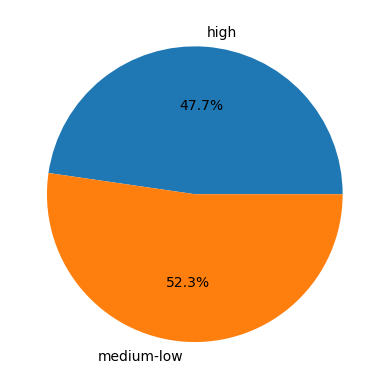

In [250]:
sizes = [high_count/len(df.axes[0]), medium_low_count/len(df.axes[0])]
labels = ['high', 'medium-low']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()



In [251]:
facilities_frequency_data = top_30_columns

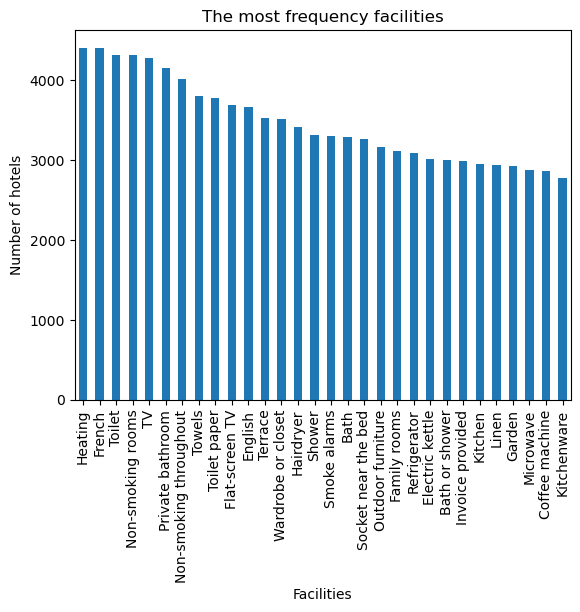

In [252]:
facilities_frequency_data.plot.bar()
plt.title('The most frequency facilities')
plt.xlabel('Facilities')
plt.ylabel('Number of hotels')
plt.show()

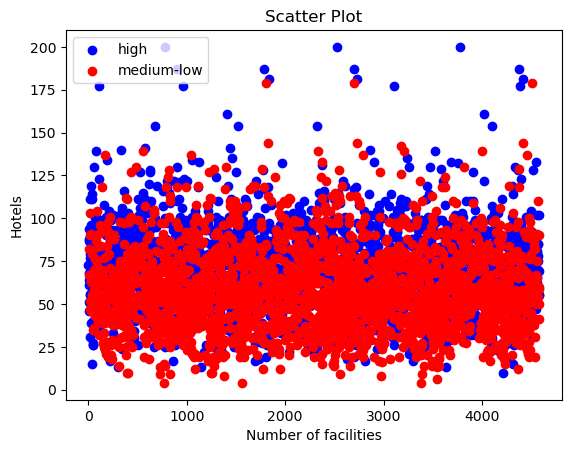

In [253]:
x = df['class'].tolist()
y = df['numOfFacilitiesAndServices'].tolist()

# filter x and y coordinates
x_high = [i for i, val in enumerate(x) if val == 'high']
y_high = [y[i] for i, val in enumerate(x) if val == 'high']
x_mediumlow = [i for i, val in enumerate(x) if val == 'medium-low']
y_mediumlow = [y[i] for i, val in enumerate(x) if val == 'medium-low']

# Create a scatter plot
plt.scatter(x_high, y_high, c='blue', label='high')
plt.scatter(x_mediumlow, y_mediumlow, c='red', label='medium-low')

# Add a title and labels
plt.title('Scatter Plot')
plt.xlabel('Number of facilities')
plt.ylabel('Hotels')
plt.legend()

# Show the plot
plt.show()

In [283]:
cities=["Paris", "Marseille", "Lyon" , "Nice", "Nantes", "Strasbourg"]
hotelsPerCityDictionary = {"Paris": 0, "Marseille": 0, "Lyon": 0, "Nice": 0, "Nantes": 0, "Strasbourg": 0}
for city in cities:
    numOfHotels=df.loc[(df["City"] == city) & (df["class"] == "high")].shape[0]
    hotelsPerCityDictionary[city] = numOfHotels
    
s=pd.Series(hotelsPerCityDictionary)

In [284]:
s

Paris         428
Marseille     394
Lyon          392
Nice          395
Nantes        423
Strasbourg    155
dtype: int64

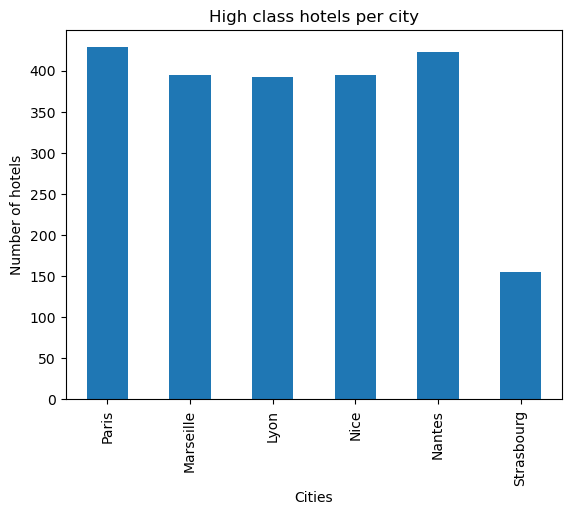

In [286]:
s.plot.bar()
plt.title('High class hotels per city')
plt.xlabel('Cities')
plt.ylabel('Number of hotels')
plt.show()